In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#Graphics in SVG
%config InlineBackend.figure_format='svg'
#Disable Warnings
import warnings
warnings.filterwarnings('ignore')
#Increase the default plot size and set the color scheme
plt.rcParams['figure.figsize'] = 8,5
plt.rcParams['image.cmap'] = 'viridis'


In [11]:
#Load Dataset
df=pd.read_csv("D:\\hackveda\\video_games_sales.csv")

df.shape

(16719, 16)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [19]:
#change some columns as numerical features
#df['User_Score'] = df['User_Score'].astype('int64')
#df['Year_of_Release'] = df['Year_of_Release'].astype('int64')
#df['User_Count'] = df['User_Count'].astype('int64')
#df['Critic_Count'] = df['Critic_Count'].astype('intt64')

In [21]:
#useful Columns
useful_cols = ['Name', 'Platform', 'Year_of_Release', 'Genre','Global_Sales','Critic_Score','Critic_Count',
              'User_Score','User_Count','Rating']
df[useful_cols].head(2)

,Name,Platform,Year_of_Release,Genre,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,82.53,76.0,51.0,8,322.0,E
1,Super Mario Bros.,NES,1985.0,Platform,40.24,NaN,NaN,NaN,NaN,NaN


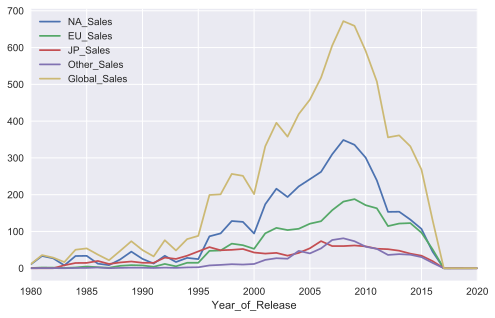

In [31]:
df[[x for x in df.columns if 'Sales' in x]+['Year_of_Release']].groupby('Year_of_Release').sum().plot()

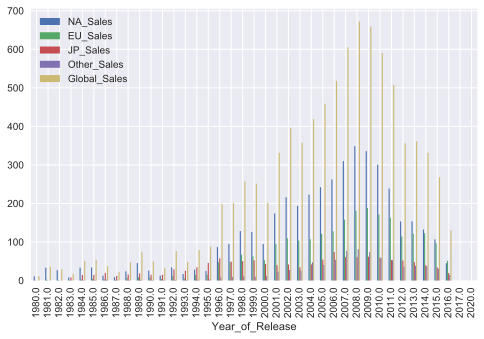

In [33]:
df[[x for x in df.columns if 'Sales' in x]+['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind = 'bar')

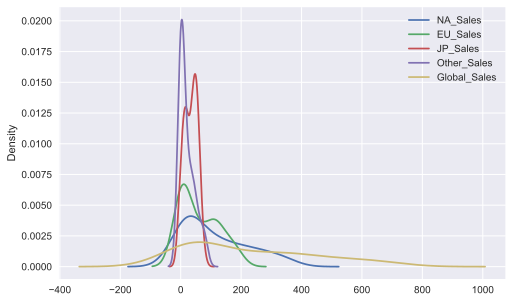

In [35]:
df[[x for x in df.columns if 'Sales' in x]+['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind='density')

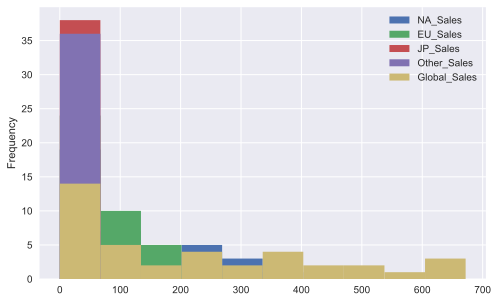

In [36]:
df[[x for x in df.columns if 'Sales' in x]+['Year_of_Release']].groupby('Year_of_Release').sum().plot(kind ='hist')

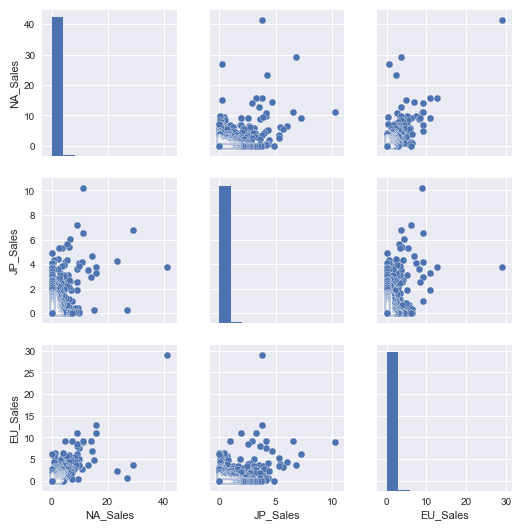

In [46]:
#pairplot
%config InlineBackend.figure_format='png'
sns.pairplot(df[['NA_Sales','JP_Sales','EU_Sales']])

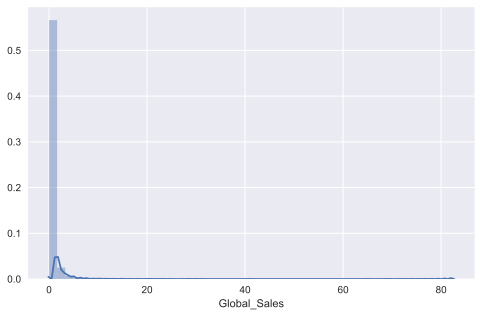

In [48]:
#Distplot - bargraph and line graph together
%config InlineBackend.figure_format='svg'
sns.distplot(df['Global_Sales'])

In [50]:
sns.jointplot(x='Global_Sales',y='Year_of_Release',data=df, kind='scatter')

In [51]:
#plotly library

import plotly
import plotly.graph_objs as go

In [53]:
years_df = df.groupby('Year_of_Release')[['Global_Sales']].sum().join(df.groupby('Year_of_Release')[['Name']].count())
years_df.columns = ['Global_Sales','Number_of_Games']
print(years_df.columns)

Index(['Global_Sales', 'Number_of_Games'], dtype='object')


In [57]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot,iplot
init_notebook_mode(connected=True)

trace0 = go.Scatter(x=years_df.index, y=years_df['Global_Sales'],name ='Global Sales')
trace1 = go.Scatter(x=years_df.index, y=years_df['Number_of_Games'],name = 'number of games released')
data = [trace0,trace1]

#Title

layout={'title':'Graph using Plotly'}
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

In [58]:
plotly.offline.plot(fig, filename='sample1.html',show_link=False)

'file://C:\\Users\\samee\\sample1.html'